# REQUIRED LIBRARIES TO BE IMPORTED

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
import re

# Data Preprocessing and Feature Selection

In [107]:
df1= pd.read_csv("YT_Videos_Comments.csv")
df1

C:\Users\m8cg2\AppData\Local\Temp\ipykernel_34532\3587322720.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv("YT_Videos_Comments.csv")


,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...,...,...
861957,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
861958,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
861959,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
861960,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


In [108]:
df1.shape

(861962, 9)

In [109]:
df2=df1.iloc[0:28000]
df2

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...,...,...
27995,Cleo Abram,Why I left Vox,"Thank you, Vox, for the best job I ever had. H...",54IteWmegk0,"Damn, Vox just lost some good talent.","Damn, Vox just lost some good talent.",Bindi,UCOOZaUg8X0l7GeEZ9ZAbEnA,2022-01-15T07:14:38Z
27996,Cleo Abram,Why I left Vox,"Thank you, Vox, for the best job I ever had. H...",54IteWmegk0,gender equality and how developing countries ...,gender equality and how developing countries ...,Sasindee Kodituwakk,UCEsNg-yyujhdRBq8YSy2ywg,2022-01-15T07:01:02Z
27997,Cleo Abram,Why I left Vox,"Thank you, Vox, for the best job I ever had. H...",54IteWmegk0,Soo here&#39;s the new deal<br>Work for vox <b...,Soo here's the new deal\nWork for vox \nGain p...,white collarhat,UC0ZW-ObgpYG0VCJeEVr28Gw,2022-01-15T06:40:44Z
27998,Cleo Abram,Why I left Vox,"Thank you, Vox, for the best job I ever had. H...",54IteWmegk0,Hope you would post some unique videos<br>Not ...,Hope you would post some unique videos\nNot th...,Rocking Raj,UC3sjCM4T5QJ5vqspOLVeTvQ,2022-01-15T06:33:46Z


In [110]:
df2.shape

(28000, 9)

In [111]:
import random
df=df2.sample(frac=0.125)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 16557 to 27263
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User                       3500 non-null   object
 1   Video Title                3500 non-null   object
 2   Video Description          3500 non-null   object
 3   Video ID                   3500 non-null   object
 4   Comment (Displayed)        3500 non-null   object
 5   Comment (Actual)           3499 non-null   object
 6   Comment Author             3499 non-null   object
 7   Comment Author Channel ID  3499 non-null   object
 8   Comment Time               3499 non-null   object
dtypes: object(9)
memory usage: 273.4+ KB


In [113]:
df.dropna()

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
16557,Cleo Abram,"Nuclear fusion, explained for beginners",What’s really going on with nuclear fusion?? @...,piPbnKdve9M,"Wait, they didn&#39;t just build a fusion reac...","Wait, they didn't just build a fusion reactor?...",Stoned Viking,UCpWNGbtlBgqCxVG36MDOeNA,2022-10-07T20:33:25Z
2587,Cleo Abram,Why little dogs live SO MUCH longer,"If you're a dog owner (or dog lover!), you kno...",g77y-6TnH_4,My aunties Yorkshire Terrier lived to 19 years...,My aunties Yorkshire Terrier lived to 19 years...,The Liamster,UC5ewQpRAVJoA-sMps_vC6pg,2023-02-02T17:36:19Z
16276,Cleo Abram,"Nuclear fusion, explained for beginners",What’s really going on with nuclear fusion?? @...,piPbnKdve9M,Why don&#39;t you Two girls do something you c...,Why don't you Two girls do something you can a...,Nuwan Bandara,UC8hly7CYTEZc8XxG2FiRsow,2022-10-10T08:55:34Z
3791,Cleo Abram,F1's looming crisis,"You know Formula 1, the car race sport that is...",FM4YYgHhhwQ,"F1 Will always be somewhat relevant, anyone th...","F1 Will always be somewhat relevant, anyone th...",Heys,UCNCrJjpQqP2usnTVvfid81A,2023-02-08T04:13:02Z
1900,Cleo Abram,That beautiful football shot isn't 8k,People are obsessed with this BEAUTIFUL camera...,M0rP-Gii0Ls,This is such a cool explainer!!!! 😍,This is such a cool explainer!!!! 😍,Muhammad Khalid,UCgrbPdgSpQdFVcIrvmj_KyA,2023-02-12T16:10:56Z
...,...,...,...,...,...,...,...,...,...
5086,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,8foQERR0mc0,Formula E has the potential! It&#39;s just as ...,Formula E has the potential! It's just as tech...,Matt Jones,UC3DRdugOr6mmUCh3HjGT3Aw,2023-01-26T13:45:53Z
23278,Cleo Abram,Would you use an artificial womb? (I would),Artificial wombs are coming. That's a good thi...,mLYMAkgvZsI,"Wow, your courage and dedication to sharing st...","Wow, your courage and dedication to sharing st...",Kelvin R,UCTI23nr1gS8GSXgSxc6kSCQ,2022-04-14T21:34:32Z
21851,Cleo Abram,Would you use an artificial womb? (I would),Artificial wombs are coming. That's a good thi...,mLYMAkgvZsI,This is future thanks to woman choosing porn-a...,This is future thanks to woman choosing porn-a...,Einar Einarsson,UCunsOVtRpw8gVVG03_D2qjg,2022-07-18T05:31:35Z
11099,Cleo Abram,The World Cup's new high tech balls,The world cup final was wild! And so were the ...,kTNoXCP77Fo,The only high tech thing is your beautiful eye...,The only high tech thing is your beautiful eye...,Solid_Snake🇮🇹,UCkuKvPr4HVNPfu0qZ-zCFLw,2023-01-06T17:24:44Z


In [114]:
print(df.shape)

(3500, 9)


# Tfidf Vectorization

In [115]:
# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m8cg2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m8cg2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m8cg2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\m8cg2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [116]:
# Define stop words and lemmatizer object
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning and preprocesing the comments
preprocessed_comments = []
for comment in df['Comment (Actual)']:
    if pd.isnull(comment):  # Skip if comment is NaN
        continue
    
    # Ensuring the comment to be string
    comment = str(comment)
    # Remove unwanted characters in comment
    comment = re.sub(r"http\S+", "", str(comment))
    comment = re.sub('[^a-zA-Z0-9]+', ' ', str(comment))
    
    # Tokenize comment
    tokens = nltk.word_tokenize(comment)
    
    # Remove stop words and lemmatize tokens
    preprocessed_tokens = []
    for token in tokens:
        if token.lower() not in stop_words:
            preprocessed_tokens.append(lemmatizer.lemmatize(token.lower()))
    
    # Join preprocessed tokens back into a single string
    preprocessed_comment = ' '.join(preprocessed_tokens)
    preprocessed_comments.append(preprocessed_comment)

In [117]:
# Vectorize preprocessed comments using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_comments)

In [118]:
def Silhouette_score(x,y):
  return(silhouette_score(x,y)*10)

In [119]:
print(X[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40 stored elements and shape (1, 8561)>
  Coords	Values
  (0, 8255)	0.12520984527209558
  (0, 1148)	0.24913129033061823
  (0, 3340)	0.2164580189625201
  (0, 6229)	0.25748959053013676
  (0, 4585)	0.06693783293576323
  (0, 7003)	0.17276927942072487
  (0, 5390)	0.08187202792203466
  (0, 7742)	0.13204318462338133
  (0, 5068)	0.13033285265778272
  (0, 25)	0.1678102827245286
  (0, 2260)	0.14657561978597636
  (0, 3429)	0.11663913392090583
  (0, 5881)	0.2251746771938931
  (0, 1345)	0.13591790054382535
  (0, 8455)	0.13117156908350086
  (0, 1593)	0.1449286925639809
  (0, 4518)	0.1227380393256747
  (0, 3857)	0.2898573851279618
  (0, 7924)	0.12216077706334529
  (0, 8513)	0.0843274308556124
  (0, 759)	0.11754633529314283
  (0, 2810)	0.18075439947838232
  (0, 2816)	0.10537595019492725
  (0, 1958)	0.1338962030987844
  (0, 2900)	0.1381420900281502
  (0, 8451)	0.08662278766723144
  (0, 928)	0.10261016182055288
  (0, 2890)	0.17916253810304483

# Clustering using DBSCAN, kmeans and agglomerative as a part of training

In [120]:
# Using DBSCAN clustering
db_default = DBSCAN(eps=1.0).fit(X)
labels_dbscan = db_default.fit_predict(X)
print(labels_dbscan)

[-1  0  0 ...  0  0  0]


In [121]:
# Using KMeans clustering algorithm
kmeans = KMeans(2)
kmeans.fit(X)
labels_kmeans = kmeans.fit_predict(X)

In [122]:
# Using AgglomerativeClustering clustering algorithm
X=X.toarray()
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')  
labels_agglo=cluster.fit_predict(X)

In [123]:
print("Feature Names n",vectorizer.get_feature_names_out())
print("Sparse Matrix n",X.shape,"n",X)

Feature Names n ['00' '000' '00000001' ... 'zone' 'zoomed' 'zzzzzzzzz']
Sparse Matrix n (3499, 8561) n [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [124]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# plotting clusters and silhoutte score

In [125]:
l=[]
num=[]
for i in range(0,len(X)):
  num.append(i)
  l.append(np.sum(X[i])/len(X[i]))
print(l)

[np.float64(0.0006911360303748766), np.float64(0.00032091875789918016), np.float64(0.00029497707996020293), np.float64(0.00040440811256203606), np.float64(0.00016160918574487402), np.float64(0.00024862655354742795), np.float64(0.00042278513730392275), np.float64(0.00015319507287760379), np.float64(0.0003552874124367272), np.float64(0.0002495876068393381), np.float64(0.00023183643694226933), np.float64(0.00030137895863745765), np.float64(0.00023292760339983483), np.float64(0.000320433068466647), np.float64(0.0001958227672312699), np.float64(0.0010906584286154747), np.float64(0.00031494334259938596), np.float64(0.0003411503367852538), np.float64(0.0004411166027743591), np.float64(0.00011680878402055835), np.float64(0.0004970462933062259), np.float64(0.0002802243319585846), np.float64(0.00025752070439959243), np.float64(0.0002791172101090813), np.float64(0.00016349098359978766), np.float64(0.0004448401810772046), np.float64(0.0003260744923960794), np.float64(0.0001995636066760936), np.flo

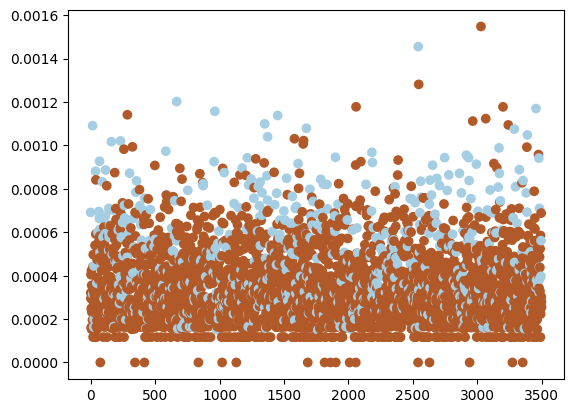

In [126]:
plt.scatter(num,l, c = labels_dbscan, cmap= "Paired")
plt.show()

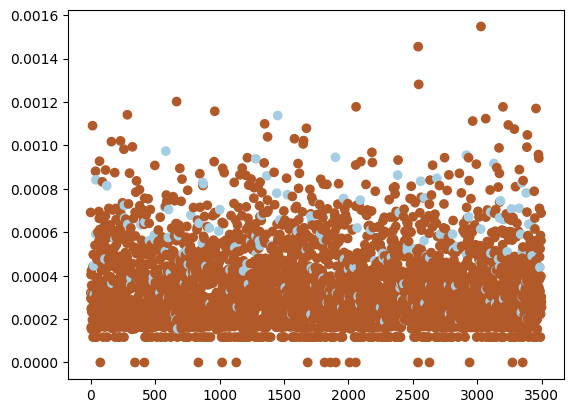

In [127]:
plt.scatter(num,l, c = labels_kmeans, cmap= "Paired")
plt.show()

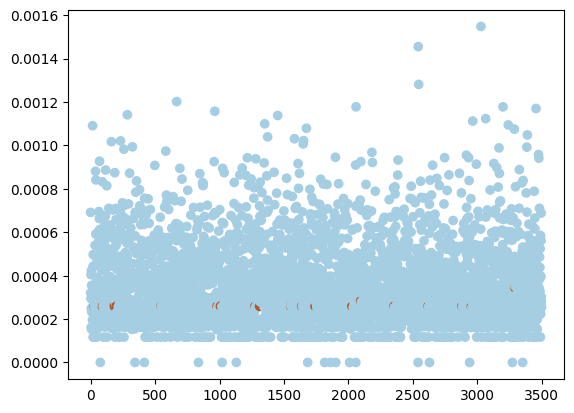

In [128]:
plt.scatter(num,l, c = labels_agglo, cmap= "Paired")
plt.show()

In [129]:

print(silhouette_score(X,labels_dbscan))

0.0007757440435359626


In [130]:
print(silhouette_score(X,labels_kmeans))

0.0037400181713022037


In [131]:
print(silhouette_score(X,labels_agglo))

0.00848548210133131


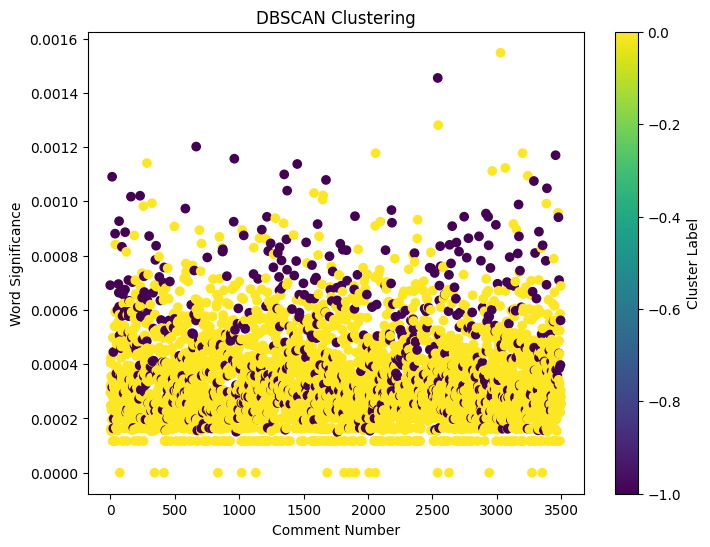

In [132]:
# Create a scatter plot using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(num, l, c=labels_dbscan, cmap='viridis')

# Add titles and labels
plt.title("DBSCAN Clustering")
plt.xlabel("Comment Number")
plt.ylabel("Word Significance")

# Display the plot
plt.colorbar(label='Cluster Label')
plt.show()

# PCA for Dimensionality Reduction

In [133]:
pca = PCA(n_components = 2)

X1 = pca.fit_transform(X)
print(X1)

[[-0.03139068  0.00915867]
 [-0.03832349 -0.01400365]
 [-0.03566764  0.02054951]
 ...
 [-0.00733481 -0.01819265]
 [-0.03139567 -0.00469608]
 [ 0.04019388  0.01792297]]


# clustering aftter PCA(plots) Finding Best Model

In [134]:
kmeans1 = KMeans(2)
kmeans1.fit(X1)
labels_kmeans1 = kmeans1.fit_predict(X1)
print(labels_kmeans1)

[0 0 0 ... 0 0 0]


In [135]:
print(X1.transpose()[0])

[-0.03139068 -0.03832349 -0.03566764 ... -0.00733481 -0.03139567
  0.04019388]


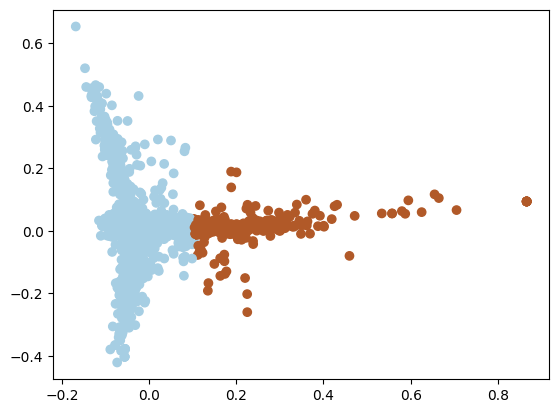

In [136]:
plt.scatter(X1.transpose()[0],X1.transpose()[1], c = labels_kmeans1, cmap= "Paired")
plt.show()

In [137]:
a=X1.transpose()[0]
b=X1.transpose()[1]

In [138]:
print(silhouette_score(X1,labels_kmeans1))

0.6727030567311015


In [139]:
min_samples = range(10,21)
eps = np.arange(0.05,0.13, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X1).labels_
        score = silhouette_score(X1, labels)
        output.append((ms, ep, score))
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.862813242471106
min_samples: 11
eps: 0.12000000000000001


In [140]:
from sklearn.cluster import DBSCAN
db_default1 = DBSCAN(eps=0.12000,min_samples=16).fit(X1)
labels_dbscan1 = db_default1.fit_predict(X1)
print(labels_dbscan1)

[0 0 0 ... 0 0 0]


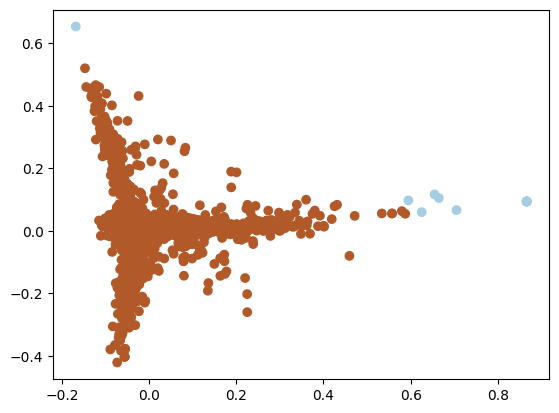

In [141]:
plt.scatter(X1.transpose()[0],X1.transpose()[1], c = labels_dbscan1, cmap= "Paired")
plt.show()

In [142]:
print(silhouette_score(X1,labels_dbscan1))

0.8524188460466556


In [143]:
# X=X.toarray()
cluster1 = AgglomerativeClustering(n_clusters=2,  linkage='ward')  
labels_agglo1=cluster1.fit_predict(X1)

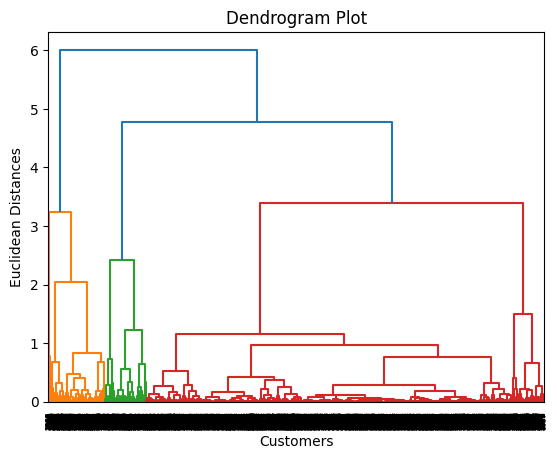

In [144]:
dendro = shc.dendrogram(shc.linkage(X1, method="ward"))  
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

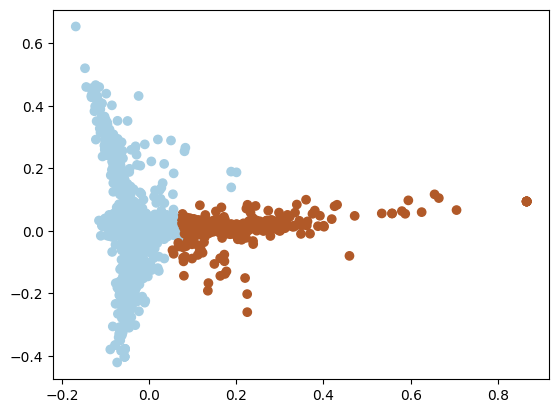

In [145]:
plt.scatter(X1.transpose()[0],X1.transpose()[1], c = labels_agglo1, cmap= "Paired")
plt.show()

In [146]:
print(silhouette_score(X1,labels_agglo1))

0.6433630750890621


In [147]:
print(X1.shape)

(3499, 2)


# prediction(plots and decision boundary)

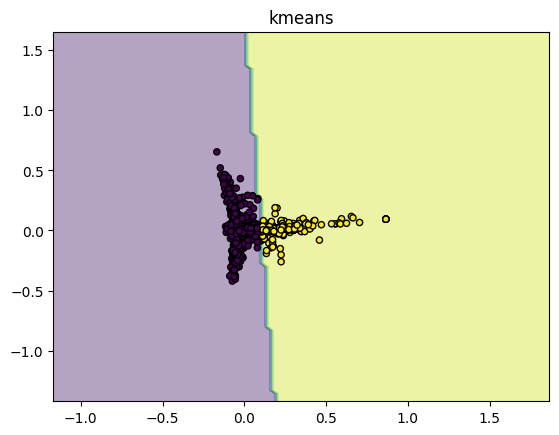

In [148]:
display=DecisionBoundaryDisplay.from_estimator(
    kmeans1, X1, alpha=0.4, plot_method='contourf' ,response_method="predict"
)
display.ax_.scatter(X1[:, 0], X1[:, 1], c=labels_kmeans1, s=20, edgecolor="k")
display.ax_.set_title("kmeans")


plt.show()

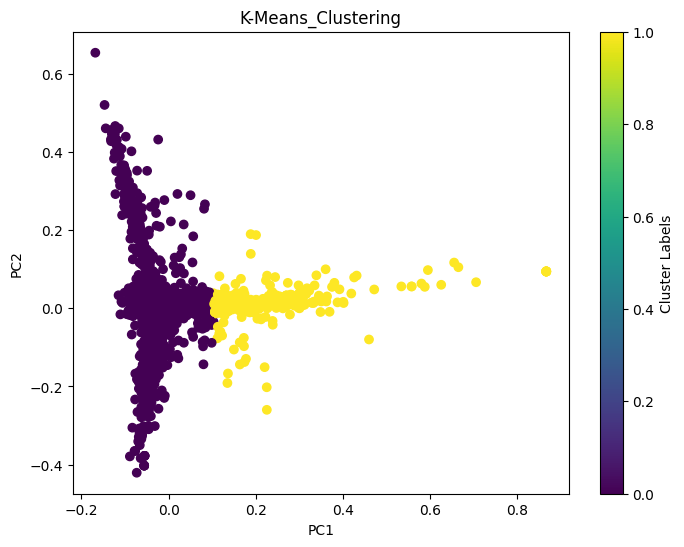

In [149]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(a, b, c=labels_kmeans1, cmap='viridis')  # 'viridis' is a popular colormap

# Add title and labels
plt.title('K-Means_Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add color bar to indicate cluster labels
plt.colorbar(scatter, label='Cluster Labels')

# Display the plot
plt.show()


# Some Visualisations

In [150]:
print(len(labels_kmeans1))

3499


In [151]:
total_comments=[]
for i in range(0,len(labels_kmeans1)):
  total_comments.append(i)

In [152]:
unique_kmeans1, counts_kmeans1 = np.unique(labels_kmeans1, return_counts=True)
print(unique_kmeans1)
print(counts_kmeans1)

[0 1]
[3180  319]


In [153]:
unique_agglo1, counts_agglo1 = np.unique(labels_agglo1, return_counts=True)
print(unique_agglo1)
print(counts_agglo1)

[0 1]
[3099  400]


In [154]:
colors=['blue','red']

In [155]:
x=['NOT SPAM', 'SPAM']

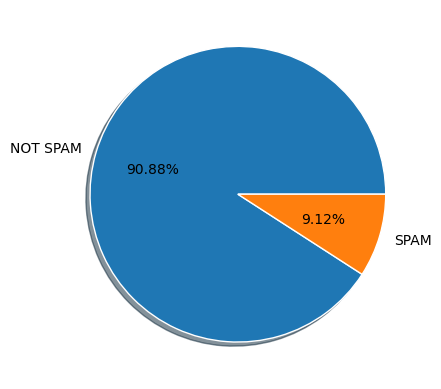

In [156]:
plt.pie(counts_kmeans1, labels = x,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },shadow=True,autopct='%1.2f%%')
plt.show()

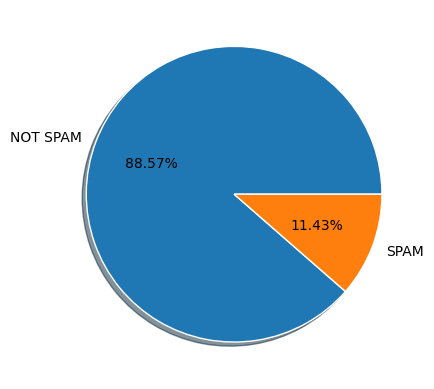

In [157]:
plt.pie(counts_agglo1, labels = x,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },shadow=True,autopct='%1.2f%%')
plt.show()